#YouTube Spam Detection using Naive Bayes Classifier

##Problem Statement
# 🧠 Problem Statement: YouTube Spam Comment Classification

YouTube's comment section is often targeted by spam messages that promote channels, products, or irrelevant content, disrupting user experience and engagement. This project aims to build a **spam detection model** using **Natural Language Processing (NLP)** and the **Naive Bayes algorithm** to classify comments as either **spam (1)** or **not spam (0)**.



##Dataset Used
The dataset consists of YouTube comments with the following columns:

- `COMMENT_ID`: Unique identifier for each comment.
- `AUTHOR`: Username of the commenter.
- `DATE`: Date when the comment was posted.
- `CONTENT`: The actual text of the comment.
- `CLASS`: Target label (1 for spam, 0 for not spam).

Our objective is to:
- Preprocess the comment text data,
- Extract meaningful features using text vectorization,
- Train a Naive Bayes model to predict spam,
- Evaluate the model's performance using classification metrics.

This lightweight and interpretable model can serve as a foundational step toward deploying more complex spam filters on user-generated platforms.


Dataset Link:
https://archive.ics.uci.edu/dataset/380/youtube+spam+collection

##Algorithm Used
##Naive Bayes Classifier

**Naive Bayes** is a family of probabilistic algorithms based on **Bayes’ Theorem**, primarily used for classification tasks in Natural Language Processing (NLP), such as spam detection, sentiment analysis, and document categorization.

It assumes that the features (words in a sentence) are **independent** of each other given the class label — hence the term *naive*. Despite this assumption, it performs remarkably well in practice, especially for **text classification** problems due to its speed, simplicity, and efficiency.

There are several variants:
- **Multinomial Naive Bayes** – used for document classification based on word frequencies.
- **Bernoulli Naive Bayes** – for binary/boolean features.
- **Gaussian Naive Bayes** – for continuous data.

In this project, we'll use the **Multinomial Naive Bayes** model, which is most suitable for our bag-of-words text data.

🔗 **Learn More:**  
[Naive Bayes Classifier - scikit-learn Documentation](https://scikit-learn.org/stable/modules/naive_bayes.html)


---
---
#Project Build

---
## 🔹 Phase 1: Data Loading & Exploration
- Load the dataset.
- Inspect the structure, types, and basic statistics.
- Check for missing values or anomalies.

###  Libraries Used

Before we begin working with the data, let's import all the required libraries and briefly understand their purpose:

- **pandas** – Used for loading, exploring, and manipulating tabular data.
- **numpy** – Provides numerical operations and array handling (used indirectly via pandas/sklearn).
- **matplotlib.pyplot** – Used for creating basic visualizations like bar plots and histograms.
- **seaborn** – A high-level visualization library based on matplotlib, used for styled plots (like heatmaps).
- **re** – Python’s built-in regular expressions module, used for cleaning text (removing links, special characters, etc.).
- **string** – Provides access to common string operations, such as removing punctuation.
- **glob.glob** – Used to fetch multiple CSV files from a directory using wildcard patterns.
- **nltk (Natural Language Toolkit)** – A powerful NLP library used here for stemming (reducing words to their base/root form).
- **sklearn.model_selection.train_test_split** – Splits the dataset into training and testing sets.
- **sklearn.feature_extraction.text.CountVectorizer** – Converts text into a bag-of-words numerical format.
- **sklearn.naive_bayes.MultinomialNB** – Implements the Naive Bayes algorithm for multinomially distributed data.
- **sklearn.metrics** – Contains utilities to evaluate model performance (accuracy, confusion matrix, precision, recall, etc.).

Let’s now proceed to load the dataset and begin exploring it!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import glob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import joblib

### Data Loading

The dataset is divided across multiple `.csv` files, each containing comments from different YouTube channels.

We will use the `glob` module to:
- Automatically find all CSV files in the specified folder path.
- Load each file into a DataFrame.
- Concatenate them into a single unified DataFrame for analysis.

This approach helps us scale the model across multiple sources and ensure we’re working with the complete dataset.

Path to all CSV files (adjust the path if needed):

```python
csv_files = glob.glob('/content/*.csv')  # Use your*_
```


In [ ]:
csv_files = glob.glob("/content/drive/MyDrive/Python Projects/Github2/Naive Bayes/data/*.csv")
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


### Data Exploration

Now since we have the globalised dataset, now we will perform EDA on dataset.

- Check the data types of each column.
- Convert the `DATE` column from `object` to `datetime`, if applicable.
- Handle missing values in `DATE`, or drop the column if it's not required for classification.
- Confirm that all other columns have the correct types (e.g., `CLASS` should be `int`).

This step ensures our dataset is clean and ready for preprocessing.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 76.5+ KB


In [ ]:
df.isnull().sum()

,0
COMMENT_ID,0
AUTHOR,0
DATE,245
CONTENT,0
CLASS,0


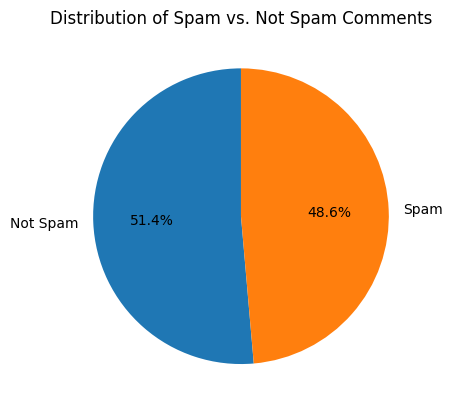

In [ ]:
plt.pie(df['CLASS'].value_counts(), labels=['Not Spam', 'Spam'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Spam vs. Not Spam Comments')
plt.show()

###Data Cleaning

Drop Irrelevant Columns

Since our classification task only depends on the **content of the comment** (`CONTENT`) and the **label** (`CLASS`), we can safely drop the following columns:

- `COMMENT_ID`: Unique identifier, not useful for learning.
- `AUTHOR`: Name of the commenter, irrelevant to the spam content itself.
- `DATE`: While sometimes useful for temporal analysis, we will not use it for this task.

This simplifies our dataset and prepares it for text cleaning and vectorization.


In [ ]:
df = df.drop(columns=['COMMENT_ID', 'AUTHOR', 'DATE'])
df.columns

Index(['CONTENT', 'CLASS'], dtype='object')

---
## 🔹 Phase 2: Data Cleaning & Preprocessing
- Clean the `CONTENT` column (remove links, punctuation, digits, etc.).
- Normalize text by converting to lowercase and removing noise.
- Prepare the data for vectorization.

### Text Cleaning & Preprocessing

Raw text data often contains noise such as links, punctuation, numbers, and casing issues that can reduce model performance.

We'll clean the `CONTENT` column through the following steps:

 Step-by-Step Cleaning:

1. **Convert to lowercase** – To normalize the text (e.g., "Spam" and "spam" should be treated the same).
2. **Remove URLs** – Strip out links like `http://...` or `watch?v=...` which are common in spam.
3. **Remove punctuation** – Clean out characters like `.,!?@` to simplify token patterns.
4. **Remove digits** – Numbers usually don’t help in spam classification here.
5. **Remove extra whitespaces** – Clean unnecessary spacing between words.

We'll apply all of these using a custom cleaning function and create a new column called `clean_content` that stores the cleaned version of each comment.

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|watch\?v=\S+", "", text)
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(rf"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\w*\d\w*", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text
df['clean_content'] = df['CONTENT'].apply(clean_text)

df.head()

,CONTENT,CLASS,clean_content
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check out this you channel
1,Hey guys check out my new channel and our firs...,1,hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com,1,just for test i have to say murdevcom
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,me shaking my sexy ass on my channel enjoy ﻿
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,check this out ﻿


###  Preparing for Text Vectorization

Now that our comment text has been **cleaned and normalized**, we’re ready to convert it into a numerical format that machine learning models can understand.

This process is called **feature extraction**, and we'll use the **Bag-of-Words** approach via `CountVectorizer`.

### 🧪 What We've Done So Far:
- ✅ Removed URLs, punctuation, digits, and extra whitespaces.
- ✅ Converted text to lowercase for normalization.
- ✅ Stored the cleaned version in a new column: `clean_content`.

### 🔧 What We’ll Do Next:
1. **Remove stopwords** – Common words like “the”, “is”, and “and” that do not carry meaningful information. (Count vectoriser provides inbuilt support for that so we can directly move on to next phase.)
2. **Convert text to numerical vectors** using `CountVectorizer`:
   - Each unique word becomes a feature (column).
   - Each comment becomes a vector based on word frequency.
3. **Prepare labels** – Use the `CLASS` column as our target variable for training.

This prepares the dataset for feeding into the **Naive Bayes classifier**.

In [ ]:
stemmer = PorterStemmer()
def apply_snowball_stemming_basic(text):
    tokens = text.split()
    stemmed = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed)
df['clean_content'] = df['clean_content'].apply(apply_snowball_stemming_basic)
df[['CONTENT', 'clean_content']].head()

,CONTENT,clean_content
0,"Huh, anyway check out this you[tube] channel: ...",huh anyway check out thi you channel
1,Hey guys check out my new channel and our firs...,hey guy check out my new channel and our first...
2,just for test I have to say murdev.com,just for test i have to say murdevcom
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,me shake my sexi ass on my channel enjoy ﻿
4,watch?v=vtaRGgvGtWQ Check this out .﻿,check thi out ﻿


---
## 🔹 Phase 3: Feature Extraction
- Convert textual data into numerical format using `CountVectorizer`.
- Create feature vectors for model input.
- Identify the features(Clean content) and target(CLASS).

###Vectorisation

We use **CountVectorizer** to convert the cleaned and stemmed text into a numerical format.

This transforms each comment into a **vector of word counts**, enabling our machine learning model to understand and learn from the text.

We also remove common English stopwords to reduce noise in the data.


In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_content'])
y = df['CLASS']
print(f"Feature matrix shape: {X.shape}")
print(f"Total unique words (features): {len(vectorizer.get_feature_names_out())}")

Feature matrix shape: (1956, 3113)
Total unique words (features): 3113


In [ ]:
vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
vectorized_df.head()

,aaaaaaa,abl,ablaz,abomin,abonn,abov,absolut,absorb,abus,abusedmistr,...,zombi,zonepacom,οh,لل,강남스타일,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｆａｎｃi,ｉｓ,ｔｈｉｓ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


At this point, we have successfully prepared our dataset for machine learning. Here's a summary of what we've achieved so far:

Cleaned & Preprocessed Text
- The original `CONTENT` column has been:
  - Lowercased
  - Stripped of URLs, punctuation, digits, and extra spaces
  - Stemmed using the **Snowball Stemmer** to reduce words to their base form
- The final cleaned text is stored in a new column: **`clean_content`**

Vectorized Feature Matrix
- The `clean_content` column has been transformed using **CountVectorizer** with stopword removal.
- This results in a **sparse matrix (`X`)** of shape `(n_samples, n_features)`, where:
  - Each row represents a comment
  - Each column represents a unique word (feature)
  - Values represent word frequencies
Target Labels
- The target variable (`y`) is taken directly from the original `CLASS` column:
  - `0` = Not Spam
  - `1` = Spam

We are now ready to split the data into training and test sets, and build a machine learning model for spam detection!


In [ ]:
dataset_shape = df.shape
vector_data_shape = vectorized_df.shape
print(f"Dataset Shape: {dataset_shape}")
print(f"Vectorized Data Shape: {vector_data_shape}")

Dataset Shape: (1956, 3)
Vectorized Data Shape: (1956, 3113)


---
## 🔹 Phase 4: Model Building & Training
- Split the dataset into training and testing sets.
- Train a **Multinomial Naive Bayes** classifier on the training data.

###Data Splitting

We split our dataset into the generally used ratio: **80% training data** and **20% testing data** using `train_test_split`.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1564, 3113)
Testing data shape: (392, 3113)


###Model Training

Now, we will train the Naive Bayes Classifier model that we decided to use by importing it from sklearn.

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

---
## 🔹 Phase 5: Model Testing and Evaluation
- Predict on the test set.
- Evaluate the model using accuracy, confusion matrix, and classification report.

###Model Testing

Now, we will test the model on test dataset and compare the predictions with test labels.

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
comparison_df.head(10)

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,0,0
8,1,1
9,1,1


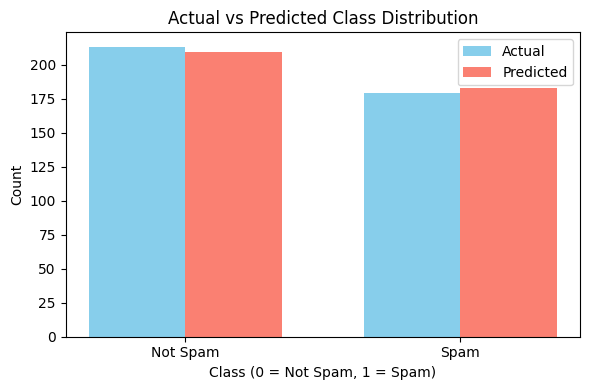

In [ ]:
pred_counts = pd.Series(y_pred).value_counts().sort_index()
actual_counts = y_test.value_counts().sort_index()
plt.figure(figsize=(6, 4))
bar_width = 0.35
index = range(len(actual_counts))
plt.bar(index, actual_counts, bar_width, label='Actual', color='skyblue')
plt.bar([i + bar_width for i in index], pred_counts, bar_width, label='Predicted', color='salmon')
plt.xlabel('Class (0 = Not Spam, 1 = Spam)')
plt.ylabel('Count')
plt.title('Actual vs Predicted Class Distribution')
plt.xticks([i + bar_width/2 for i in index], ['Not Spam', 'Spam'])
plt.legend()
plt.tight_layout()
plt.show()

###Model Evaluation

Now we will evaluate the accuracy of the model and other metrics.

In [ ]:
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔁 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy Score: 0.8928571428571429

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       213
           1       0.87      0.89      0.88       179

    accuracy                           0.89       392
   macro avg       0.89      0.89      0.89       392
weighted avg       0.89      0.89      0.89       392


🔁 Confusion Matrix:
 [[190  23]
 [ 19 160]]


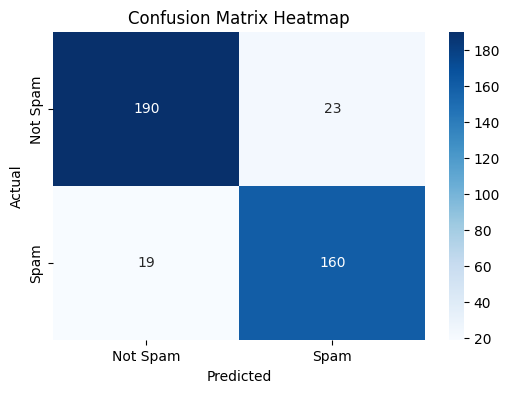

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [27]:
example_comments = [
    "Hey guys! Check out my new video and don't forget to subscribe!",
    "Thank you for this tutorial, it really helped!",
    "Win a brand new phone by clicking this link now!",
    "Great explanation, very clear and concise.",
    "Visit my channel for free giveaways!"
]
def preprocess_and_stem(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|watch\?v=\S+", "", text)
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(rf"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\w*\d\w*", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = text.split()
    stemmed = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed)
for comment in example_comments:
    cleaned = preprocess_and_stem(comment)
    vectorized = vectorizer.transform([cleaned])
    prediction = nb_model.predict(vectorized)[0]
    label = "SPAM 🚨" if prediction == 1 else "NOT SPAM ✅"
    print(f"Comment: \"{comment}\"\nPrediction: {label}\n")


Comment: "Hey guys! Check out my new video and don't forget to subscribe!"
Prediction: SPAM 🚨

Comment: "Thank you for this tutorial, it really helped!"
Prediction: SPAM 🚨

Comment: "Win a brand new phone by clicking this link now!"
Prediction: SPAM 🚨

Comment: "Great explanation, very clear and concise."
Prediction: NOT SPAM ✅

Comment: "Visit my channel for free giveaways!"
Prediction: SPAM 🚨



---
## 🔹 Phase 6: Model Implementation
🟢 Model Ready for Use!

Our Naive Bayes classifier has achieved strong and balanced performance, with an overall accuracy of ~89% and high precision/recall for both spam and non-spam comments.

This means our model is now **ready to be used in a real-world application** like a web app, spam filter, or chatbot.

### Next Steps:
- Save the trained model and vectorizer.
- Use them in a **Streamlit app** to make real-time spam predictions from user input.

In [ ]:
joblib.dump(nb_model, 'spam_classifier_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

`spam_classifier_model.pkl` → contains the trained Naive Bayes model

`vectorizer.pkl` → contains the vocabulary and transformation logic

Next, we will use the model in out streamlit app!!!

---
---

#**END**

---
---